Visualize Behavioral Trajectories and Parameter Trajectories as HP activates for different initial conditions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from CTRNNclass import *
from pyloricfitness import *

In [2]:
#Compile all the "best individuals" which are pyloric-like
file = open('../Pyloric CTRNN Genomes/savinggoodgenomes.dat')
i = 0
g = 0
f = 0
genomes = np.zeros((79,15))
fitnesses = np.zeros(79)
for item in file:
    # print(item)
    if i%3==0:
        # print('genome',item)
        genomes[g] = np.fromstring(item,sep=' ')
        g+=1
    if i%3==1:
        # print('fitness',item)
        # print(np.fromstring(item,sep=' '))
        fitnesses[f] = float(item)
        f+=1
    i += 1

#reformat from tc,bias,weights to weights,biases,tc
for i in range(len(genomes)):
    tcs = genomes[i,0:3]
    biases = genomes[i,3:6]
    weights = genomes[i,6:]
    genomes[i]=np.concatenate((weights,biases,tcs))

Indexes for pulled genomes: 
Pete - (fitness )
Quinn - (fitness )
Ronn - (fitness )
Sven - 52 (fitness 5.26218)

In [3]:
max_idx = np.where(fitnesses==max(fitnesses))[0][0]
print(genomes[max_idx])

[  1.25966  11.7919   -8.9466  -14.1082   13.505    15.8346   -4.73326
 -14.9413    7.13229   2.68606  -5.92321  -8.09309   1.0782    1.45534
   1.713  ]


[  1.25966  11.7919   -8.9466  -14.1082   13.505    15.8346   -4.73326
 -14.9413    7.13229   2.68606  -5.92321  -8.09309   1.0782    1.45534
   1.713  ]
[ 2.68606 -5.92321 -8.09309]


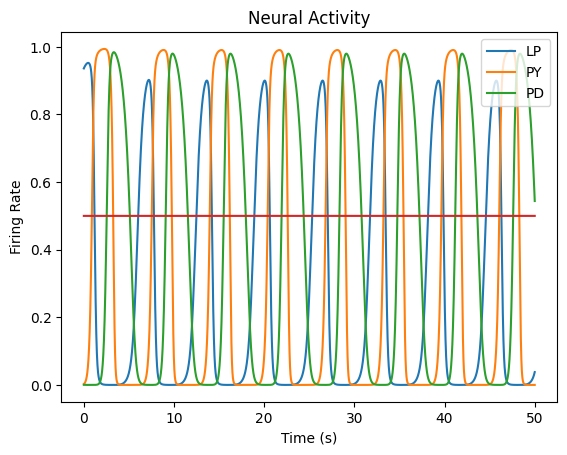

20.879375539045846


In [4]:
idx = max_idx
print(genomes[idx])

C = CTRNN(3,.001,50,None,genomes[idx])
print(C.Biases)
C.initializeState(np.array([0.,0.,0.]))
C.run(0)
C.plot()

print(pyloriclike(genomes[idx]))

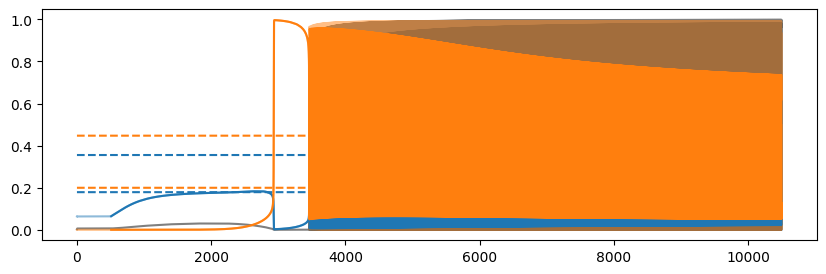

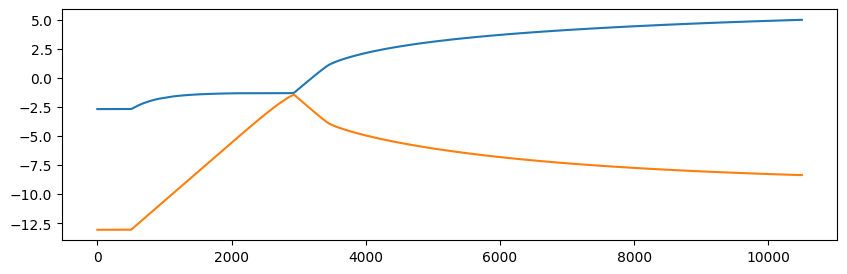

In [4]:
outputs = np.loadtxt("trackoutputs.dat")
averages = np.loadtxt("trackaverages.dat")
biases = np.loadtxt("trackbiases.dat")

transient_dur = 500
plastic_dur = 10000
stepsize = .01
transientsteps = int(transientdur/stepsize)
time = np.arange(0,transient_dur+plastic_dur+stepsize,stepsize)

HPbounds = np.array([1.78728e-01,1.99577e-01,3.55230e-01,4.47151e-01])
windowdur = 10
windowsteps = int(windowdur/stepsize)

colors = ['tab:blue','k','tab:orange']
labels = ['LP','PY','PD']

plt.figure(figsize=(10,3))
for i in range(3):
    plt.plot(time,outputs[:,i],color=colors[i],alpha=.5,label=labels[i])
plt.plot(time,np.ones(len(time))*HPbounds[0],linestyle="dashed",color = colors[0])
plt.plot(time,np.ones(len(time))*HPbounds[1],linestyle="dashed",color= colors[2])
plt.plot(time,np.ones(len(time))*HPbounds[2],linestyle="dashed",color = colors[0])
plt.plot(time,np.ones(len(time))*HPbounds[3],linestyle="dashed",color= colors[2])
for i in [0,2]:
    plt.plot(time[transientsteps+windowsteps:],averages[transientsteps+windowsteps:,i],color=colors[i])
# plt.legend()
plt.show()
plt.figure(figsize=(10,3))
plt.plot(time,biases)
plt.show()


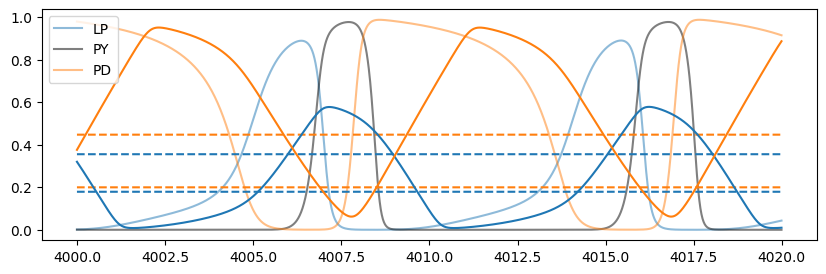

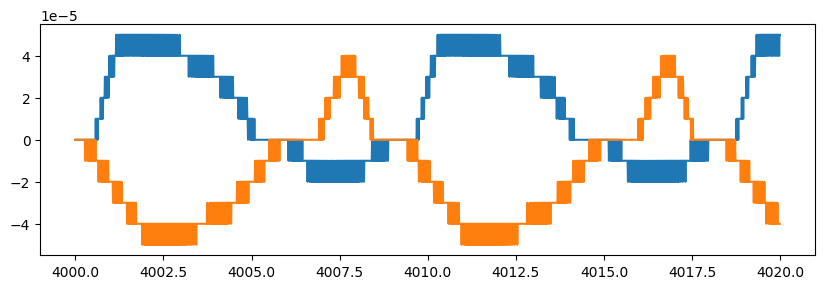

In [54]:
#zoom in 
plt.figure(figsize=(10,3))
timelb_sec = 4000
timelb = int(timelb_sec/stepsize)
timeub_sec = 4020
timeub = int(timeub_sec/stepsize)
for i in range(3):
    plt.plot(time[timelb:timeub],outputs[timelb:timeub,i],color=colors[i],alpha=.5,label=labels[i])

plt.plot(time[timelb:timeub],np.ones(len(time[timelb:timeub]))*HPbounds[0],linestyle="dashed",color = colors[0])
plt.plot(time[timelb:timeub],np.ones(len(time[timelb:timeub]))*HPbounds[1],linestyle="dashed",color= colors[2])
plt.plot(time[timelb:timeub],np.ones(len(time[timelb:timeub]))*HPbounds[2],linestyle="dashed",color = colors[0])
plt.plot(time[timelb:timeub],np.ones(len(time[timelb:timeub]))*HPbounds[3],linestyle="dashed",color= colors[2])

for i in [0,2]:
    plt.plot(time[timelb:timeub],averages[timelb:timeub,i],color=colors[i])
plt.legend()
plt.show()
plt.figure(figsize=(10,3))
# plt.plot(time[timelb:timeub],biases[timelb:timeub])
# plt.show()

#hard to see changes in biases so showing the bias DERIVATIVE
bias_der = np.diff(biases,axis=0)
plt.plot(time[timelb:timeub],bias_der[timelb:timeub])
plt.show()

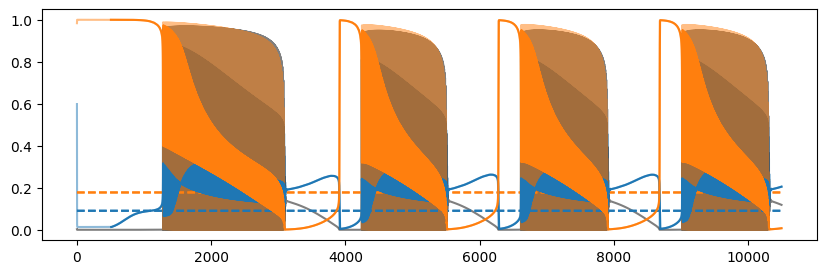

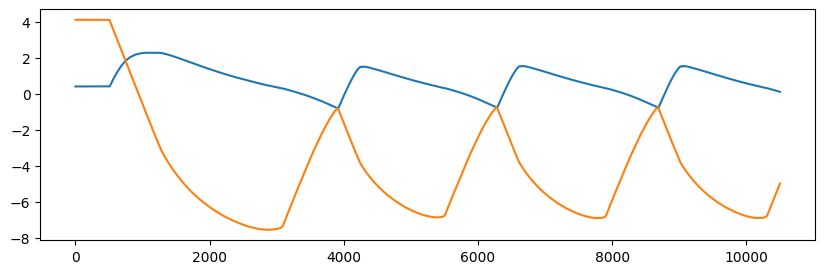

In [10]:
outputs = np.loadtxt("trackoutputsstatic.dat")
averages = np.loadtxt("trackaveragesstatic.dat")
biases = np.loadtxt("trackbiasesstatic.dat")

transient_dur = 500
plastic_dur = 10000
stepsize = .01
transientsteps = int(transientdur/stepsize)
time = np.arange(0,transient_dur+plastic_dur+stepsize,stepsize)

HPbounds = np.array([0.0905365, 0.177696 ,0.0905365, 0.177696])
windowdur = np.array([9.92872, 0, 6.0916])
windowsteps = ((windowdur/stepsize).astype(int))+3

colors = ['tab:blue','k','tab:orange']
labels = ['LP','PY','PD']

plt.figure(figsize=(10,3))
for i in range(3):
    plt.plot(time,outputs[:,i],color=colors[i],alpha=.5,label=labels[i])
plt.plot(time,np.ones(len(time))*HPbounds[0],linestyle="dashed",color = colors[0])
plt.plot(time,np.ones(len(time))*HPbounds[1],linestyle="dashed",color= colors[2])
plt.plot(time,np.ones(len(time))*HPbounds[2],linestyle="dashed",color = colors[0])
plt.plot(time,np.ones(len(time))*HPbounds[3],linestyle="dashed",color= colors[2])
for i in [0,2]:
    plt.plot(time[transientsteps+windowsteps[i]:],averages[transientsteps+windowsteps[i]:,i],color=colors[i])
# plt.legend()
plt.show()
plt.figure(figsize=(10,3))
plt.plot(time,biases)
plt.show()
